In [1]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

In [2]:
# import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')

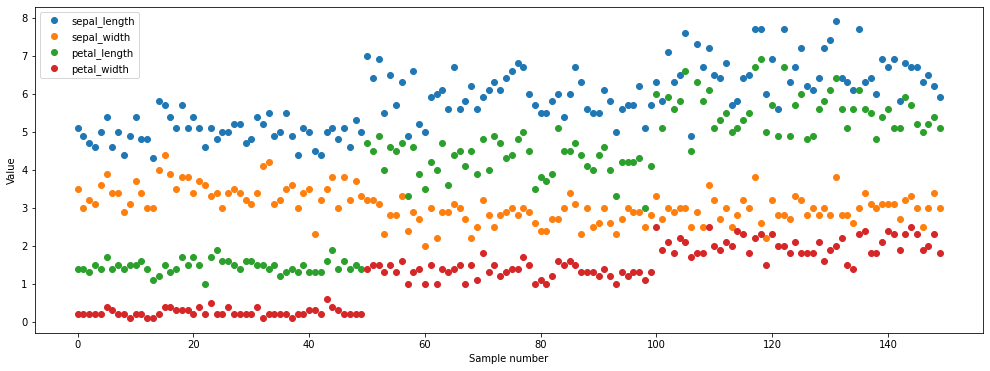

In [3]:
# Import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')

# Organize the data

# Convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# Transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica']  = 2

# Plot the data
iris.plot(marker='o', linestyle='none', figsize=(17, 6))
plt.xlabel('Sample number')
plt.ylabel('Value')
plt.show()

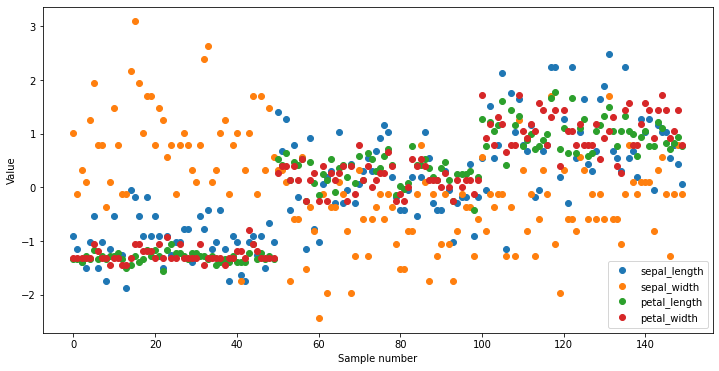

In [4]:
####   ------------------------------- < NOTE ABOUT THIS CELL!!! > ---------------------------------------   ####
#                                                                                                               #
# The code here is intentionally commented out. We're going to use this in the lecture "The importance of       #
# data standardization" in the next section. If you're not doing that lecture, leave this commented! Thanks!    #
#                                                                                                               #
####   ------------------------------- </ NOTE ABOUT THIS CELL!!! > --------------------------------------   ####


# z-score the data
import scipy.stats as stats
cols2zscore = iris.keys()
cols2zscore = cols2zscore.drop('species')
iris[cols2zscore] = iris[cols2zscore].apply(stats.zscore)

iris.plot(marker='o',linestyle='none',figsize=(12,6))
plt.xlabel('Sample number')
plt.ylabel('Value')
plt.show()

# Break the data into batches

In [97]:
# Separate the data into DataLoaders
# Use scikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

# Then convert them into PyTorch Datasets (note: already converted to tensors)
train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

# Finally, translate into dataloader objects
batch_size = 4
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=test_dataset.tensors[0].shape[0])

In [98]:
# Check sizes of data batches
for X, y in train_loader:
  print(f'{X.shape} | {y.shape}\n')

# go back and set drop_last=True in training DataLoader

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([4, 4]) | torch.Size([4])

torch.Size([

# Construct the model and training plans

In [99]:
def create_a_new_model():
  # Model architecture
  ANN_iris = nn.Sequential(
    nn.Linear(4, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 3)
  )

  # Loss Function
  loss_func = nn.CrossEntropyLoss()

  # Optimizer
  optimizer = torch.optim.SGD(params=ANN_iris.parameters(), lr=0.0005)

  return ANN_iris, loss_func, optimizer

In [100]:
# Global parameter
num_epochs = 500

def train_the_model(ANN_model, loss_func, optimizer):
  # Initialize accuracies as empties
  train_acc = []
  test_acc = []
  losses = []

  # Loop over epochs
  for epoch_i in range(num_epochs):

    # Loop over training data batches
    batch_acc = []
    batch_loss = []

    for X, y in train_loader:

      # Forward pass and loss
      y_hat = ANN_model(X)
      loss = loss_func(y_hat, y)

      # Backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      # Compute training accuracy just for this batch
      batch_acc.append(100 * torch.mean(((torch.argmax(y_hat, axis=1)) == y).float()).item())
      batch_loss.append(loss.item())
    # End of batch loop...

    # Now that we've trained through the batches, get their average training accuracy
    train_acc.append(np.mean(batch_acc))
    losses.append(np.mean(batch_loss))

    # Test accuracy
    # Extract x,y from test dataloader
    X, y = next(iter(test_loader))
    y_hat = ANN_model(X)
    test_acc.append(100 * torch.mean(((torch.argmax(y_hat, axis=1)) == y).float()).item())
  
  # Function output
  return train_acc, test_acc, losses

# Test it out

In [101]:
# Create a model
ANN_iris, loss_func, optimizer = create_a_new_model()

# Train the model
train_acc, test_acc, losses = train_the_model(ANN_model=ANN_iris, loss_func=loss_func, optimizer=optimizer)

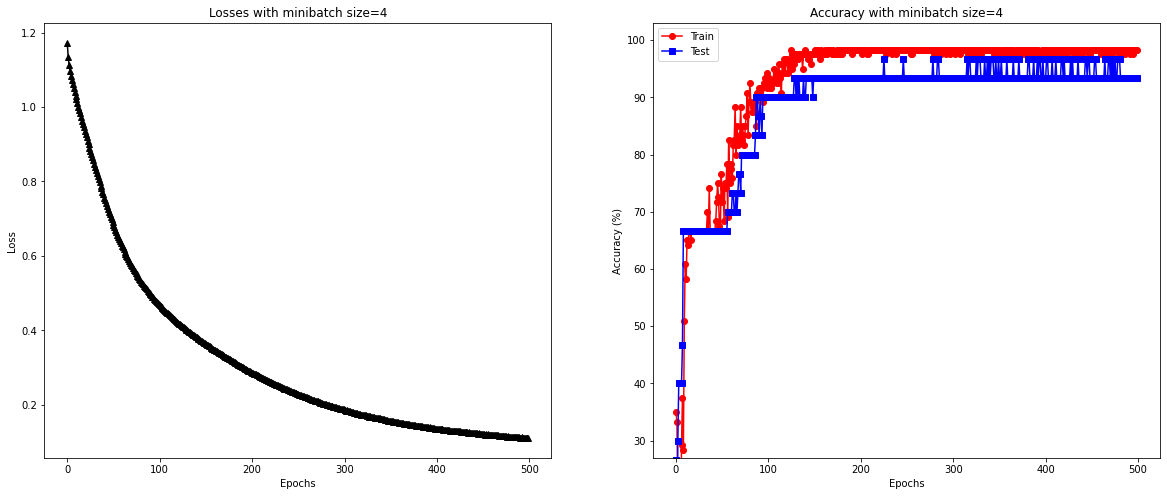

In [102]:
# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].plot(losses,'k^-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses with minibatch size=' + str(batch_size))

ax[1].plot(train_acc,'ro-')
ax[1].plot(test_acc,'bs-')
ax[1].set_title('Accuracy with minibatch size=' + str(batch_size))
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(['Train','Test'])
ax[1].set_ylim([27, 103])

plt.show()

# Additional explorations
1) Is there a relationship between the test_size parameter in train_test_split(), the batchsize parameter in DataLoader,
   and the length of test_data? Think of your answer first, then test it in code, by creating new dataloader objects 
   with varying test_size parameters.
   Hint: You can use the code 'len(test_data.dataset.tensors[1])', which returns the length of the labels vector.

2) Let's say you didn't care about the three types of irises; you only want a model that labels a flower as setosa or 
   "other." What would you have to change in the data and in the model to make this work?

3) In the course section "More on data," you will learn that unbalanced designs can be problematic for DL models (an
   unbalanced design means that there is an uneven distribution of samples in different categories). Does the 
   modification in #2 produce an unbalanced design? To find out, count the number of data labels that are 0 (setosa) or
   1 (not setosa).